<div style="background-color:	#880E4F ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white">Deep Learning - Transforming Fashion</h1>
<b style="color:black"> Kaggle: Yoyoyoghurt(teamnaam), JortAkershoek, juliaboschman, Sam Keesen </b>
   
<b style="color:white"> Jort Akershoek, Julia Boschman, Sam Keesen</b>
    </div>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
2. [H2: EDA](#2.0)
    - [&sect;2.1: Afbeeldingen en hun bounding-boxes](#2.1)
    - [&sect;2.2: Categorieën](#2.2)
    - [&sect;2.3: Afbeeldingen image-captioning](#2.3)
    - [&sect;2.4: Gemeenschappelijke items](#2.4)
    - [&sect;2.5: Conclusie EDA](#2.5)
3. [H3: Object Detectie](#3.0)
    - [&sect;3.1: Model](#3.1)
    - [&sect;3.2: Voorspellingen](#3.2)
    - [&sect;3.3: Afbeeldingen voorverwerken](#3.3)
    - [&sect;3.4: Stappen feature engineering](#3.4)
    - [&sect;3.5: Keuzes parameters, optimizer en epochs](#3.5)
    - [&sect;3.6: Loss functie](#3.6)
4. [H4: Ondertiteling van afbeeldingen](#4.0)
    - [&sect;4.1: Finetuning model](#4.1)
    - [&sect;4.2: Uitleg model](#4.2)
    - [&sect;4.3: Keuzes parameters, optimizer en epochs](#4.3)
5. [H5: Beeldgeneratie](#5.0)
    - [&sect;5.1: Hugging Face Model](#5.1)
    - [&sect;5.2: Naam modelarchitectuur en dataset](#5.2)
    - [&sect;5.3: Stappen finetunen](#5.3)
    - [&sect;5.4: Componenten model](#5.4)
    - [&sect;5.5: Afbeeldingen maken en loss functie](#5.5)
    - [&sect;5.6: Keuzes parameters, optimizer en epochs](#5.6)
6. [H6: Implementatie](#6.0)
    - [&sect;6.1: App](#6.1)
    - [&sect;6.2: Samenvattingen uitkomsten modelleren](#6.2)
    - [&sect;6.3: Overzicht resultaten](#6.3)
    - [&sect;6.4: Kaggle scores](#6.4)
7. [H7: Conclusie en aanbevelingen](#7.0)
    - [&sect;7.1: Uitdagingen en omschrijving modelleringsproces](#7.1)
    - [&sect;7.2: Aanbevolen gebruik](#7.2)
    - [&sect;7.3: Aanbevelingen soort data](#7.3)
    - [&sect;7.4: Resultaten betrouwbaar?](#7.4)
8. [H8: Literatuurlijst](#8.0)

In [ ]:
#alle nodige imports

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: EDA</strong></h2>
</div>

<a name='2.1'></a>
<h3>&sect;2.1: Afbeeldingen en hun bounding-boxes</h3>

In [12]:
import tensorflow as tf
img_directory = "images"
image_size = (600, 400)
batch_size = 4

image_dataset = tf.keras.utils.image_dataset_from_directory(
    img_directory,
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

image_file_paths = image_dataset.file_paths

Found 2145 files belonging to 1 classes.


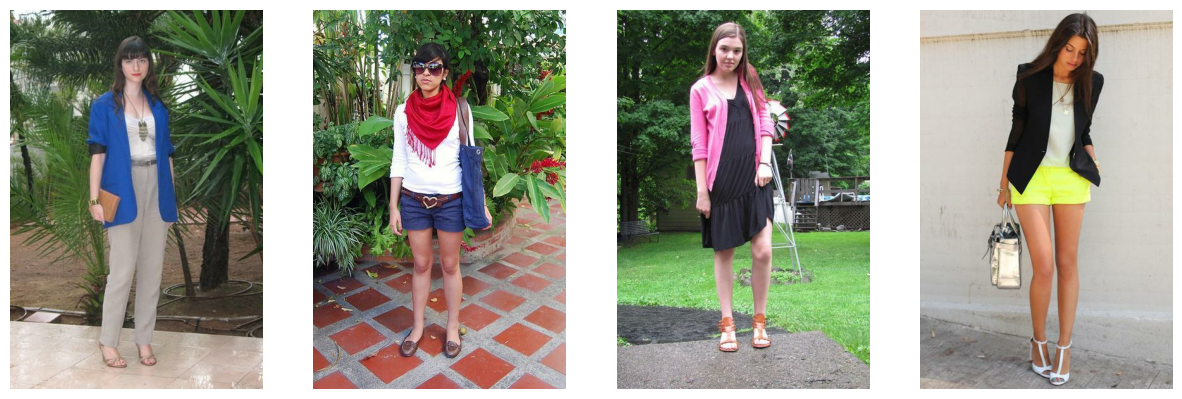

In [13]:
import matplotlib.pyplot as plt

image_iterator = iter(image_dataset)
batch_images = next(image_iterator)

num_images_to_display = 4

plt.figure(figsize=(15, 8))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(batch_images[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

<a name='2.2'></a>
<h3>&sect;2.2: Categorieën</h3>

- 0 = sunglass
- 1 = hat
- 2 = jacket
- 3 = shirt
- 4 = pants
- 5 = shorts
- 6 = skirt
- 7 = dress
- 8 = bag
- 9 = shoe

<a name='2.3'></a>
<h3>&sect;2.3: Afbeeldingen image-captioning</h3>

<a name='2.4'></a>
<h3>&sect;2.4: Gemeenschappelijke items</h3>

<a name='2.5'></a>
<h3>&sect;2.5: Bevindingen EDA</h3>

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Object detectie</strong></h2>
</div>

<a name='3.1'></a>
<h3>&sect;3.1: Model</h3>

<a name='3.2'></a>
<h3>&sect;3.2: Voorspellingen</h3>

<a name='3.3'></a>
<h3>&sect;3.3: Afbeeldingen voorverwerken</h3>

<a name='3.4'></a>
<h3>&sect;3.4: Stappen feature engineering</h3>

<a name='3.5'></a>
<h3>&sect;3.5: Keuzes parameters, optimizer en epochs</h3>

<a name='3.6'></a>
<h3>&sect;3.6: Loss functie</h3>

[Back to the top](#start)
<a name='4.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Ondertiteling van afbeeldingen</strong></h2>
</div>

<a name='4.1'></a>
<h3>&sect;4.1: Finetuning model</h3>

<a name='4.2'></a>
<h3>&sect;4.2: Uitleg model</h3>

<a name='4.3'></a>
<h3>&sect;4.3: Keuzes parameters, optimizer en epochs</h3>

[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H5: Beeld generatie</strong></h2>
</div>

<a name='5.1'></a>
<h3>&sect;5.1: Hugging Face model</h3>

<a name='5.2'></a>
<h3>&sect;5.2: Naam modelarchitectuur en dataset</h3>

<a name='5.3'></a>
<h3>&sect;5.3: Stappen finetunen</h3>

<a name='5.4'></a>
<h3>&sect;5.4: Componenten model</h3>

<a name='5.5'></a>
<h3>&sect;5.5: Afbeeldingen maken en loss functie</h3>

<a name='5.6'></a>
<h3>&sect;5.6: Keuzes parameters, optimizer en epochs</h3>

[Back to the top](#start)
<a name='6.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H6: Implementatie</strong></h2>
</div>

<a name='6.1'></a>
<h3>&sect;6.1: App</h3>

<a name='6.2'></a>
<h3>&sect;6.2: Samenvatting uitkomsten modelleren</h3>

<a name='6.3'></a>
<h3>&sect;6.3: Overzicht resultaten</h3>

<a name='6.4'></a>
<h3>&sect;6.4: Kaggle scores</h3>

[Back to the top](#start)
<a name='7.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H7: Conclusie en aanbevelingen</strong></h2>
</div>

<a name='7.1'></a>
<h3>&sect;7.1: Uitdagingen en omschrijving modelleringsproces</h3>

<a name='7.2'></a>
<h3>&sect;7.2: Aanbevolen gebruik</h3>

<a name='7.3'></a>
<h3>&sect;7.3: Aanbevelingen soort data</h3>

<a name='7.4'></a>
<h3>&sect;7.4: Resultaten betrouwbaar?</h3>

[Back to the top](#start)
<a name='8.0'></a>

<div style="background-color:#880E4F; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H8: Literatuurlijst</strong></h2>
</div>